In [ ]:
import pygmt
import pickle
import numpy as np
import xarray as xr
from pathlib import Path

In [ ]:
PROJECT_ROOT = Path.cwd().parent
data_filename=PROJECT_ROOT/"result/moho_moon_run1.pkl"
result_filename=PROJECT_ROOT/"fig/moon_thickness_run1_pygmt.png"

In [ ]:
with open(data_filename, "rb") as f:
    result = pickle.load(f)

In [16]:
thick_grid = result['thick_grid']
thick=thick_grid.data
nlat, nlon = thick.shape

In [20]:
lats = np.linspace(90, -90, nlat)
lons = np.linspace(0, 360, nlon)

thick_da=xr.DataArray(thick, coords=[lats, lons], dims=["lat", "lon"])

In [39]:
fig = pygmt.Figure()

fig.grdimage(
    grid=thick_da,
    region=[-270, 90, -90, 90],
    projection="R20c",
    frame=["WSne+t Moon Crustal Thickness (km) ", "xa10g", "ya30g"],
)
fig.colorbar(
    frame='xaf+l Crustal thickness (km) ', position="JBC+w15c/0.5c+o0/1c"
)

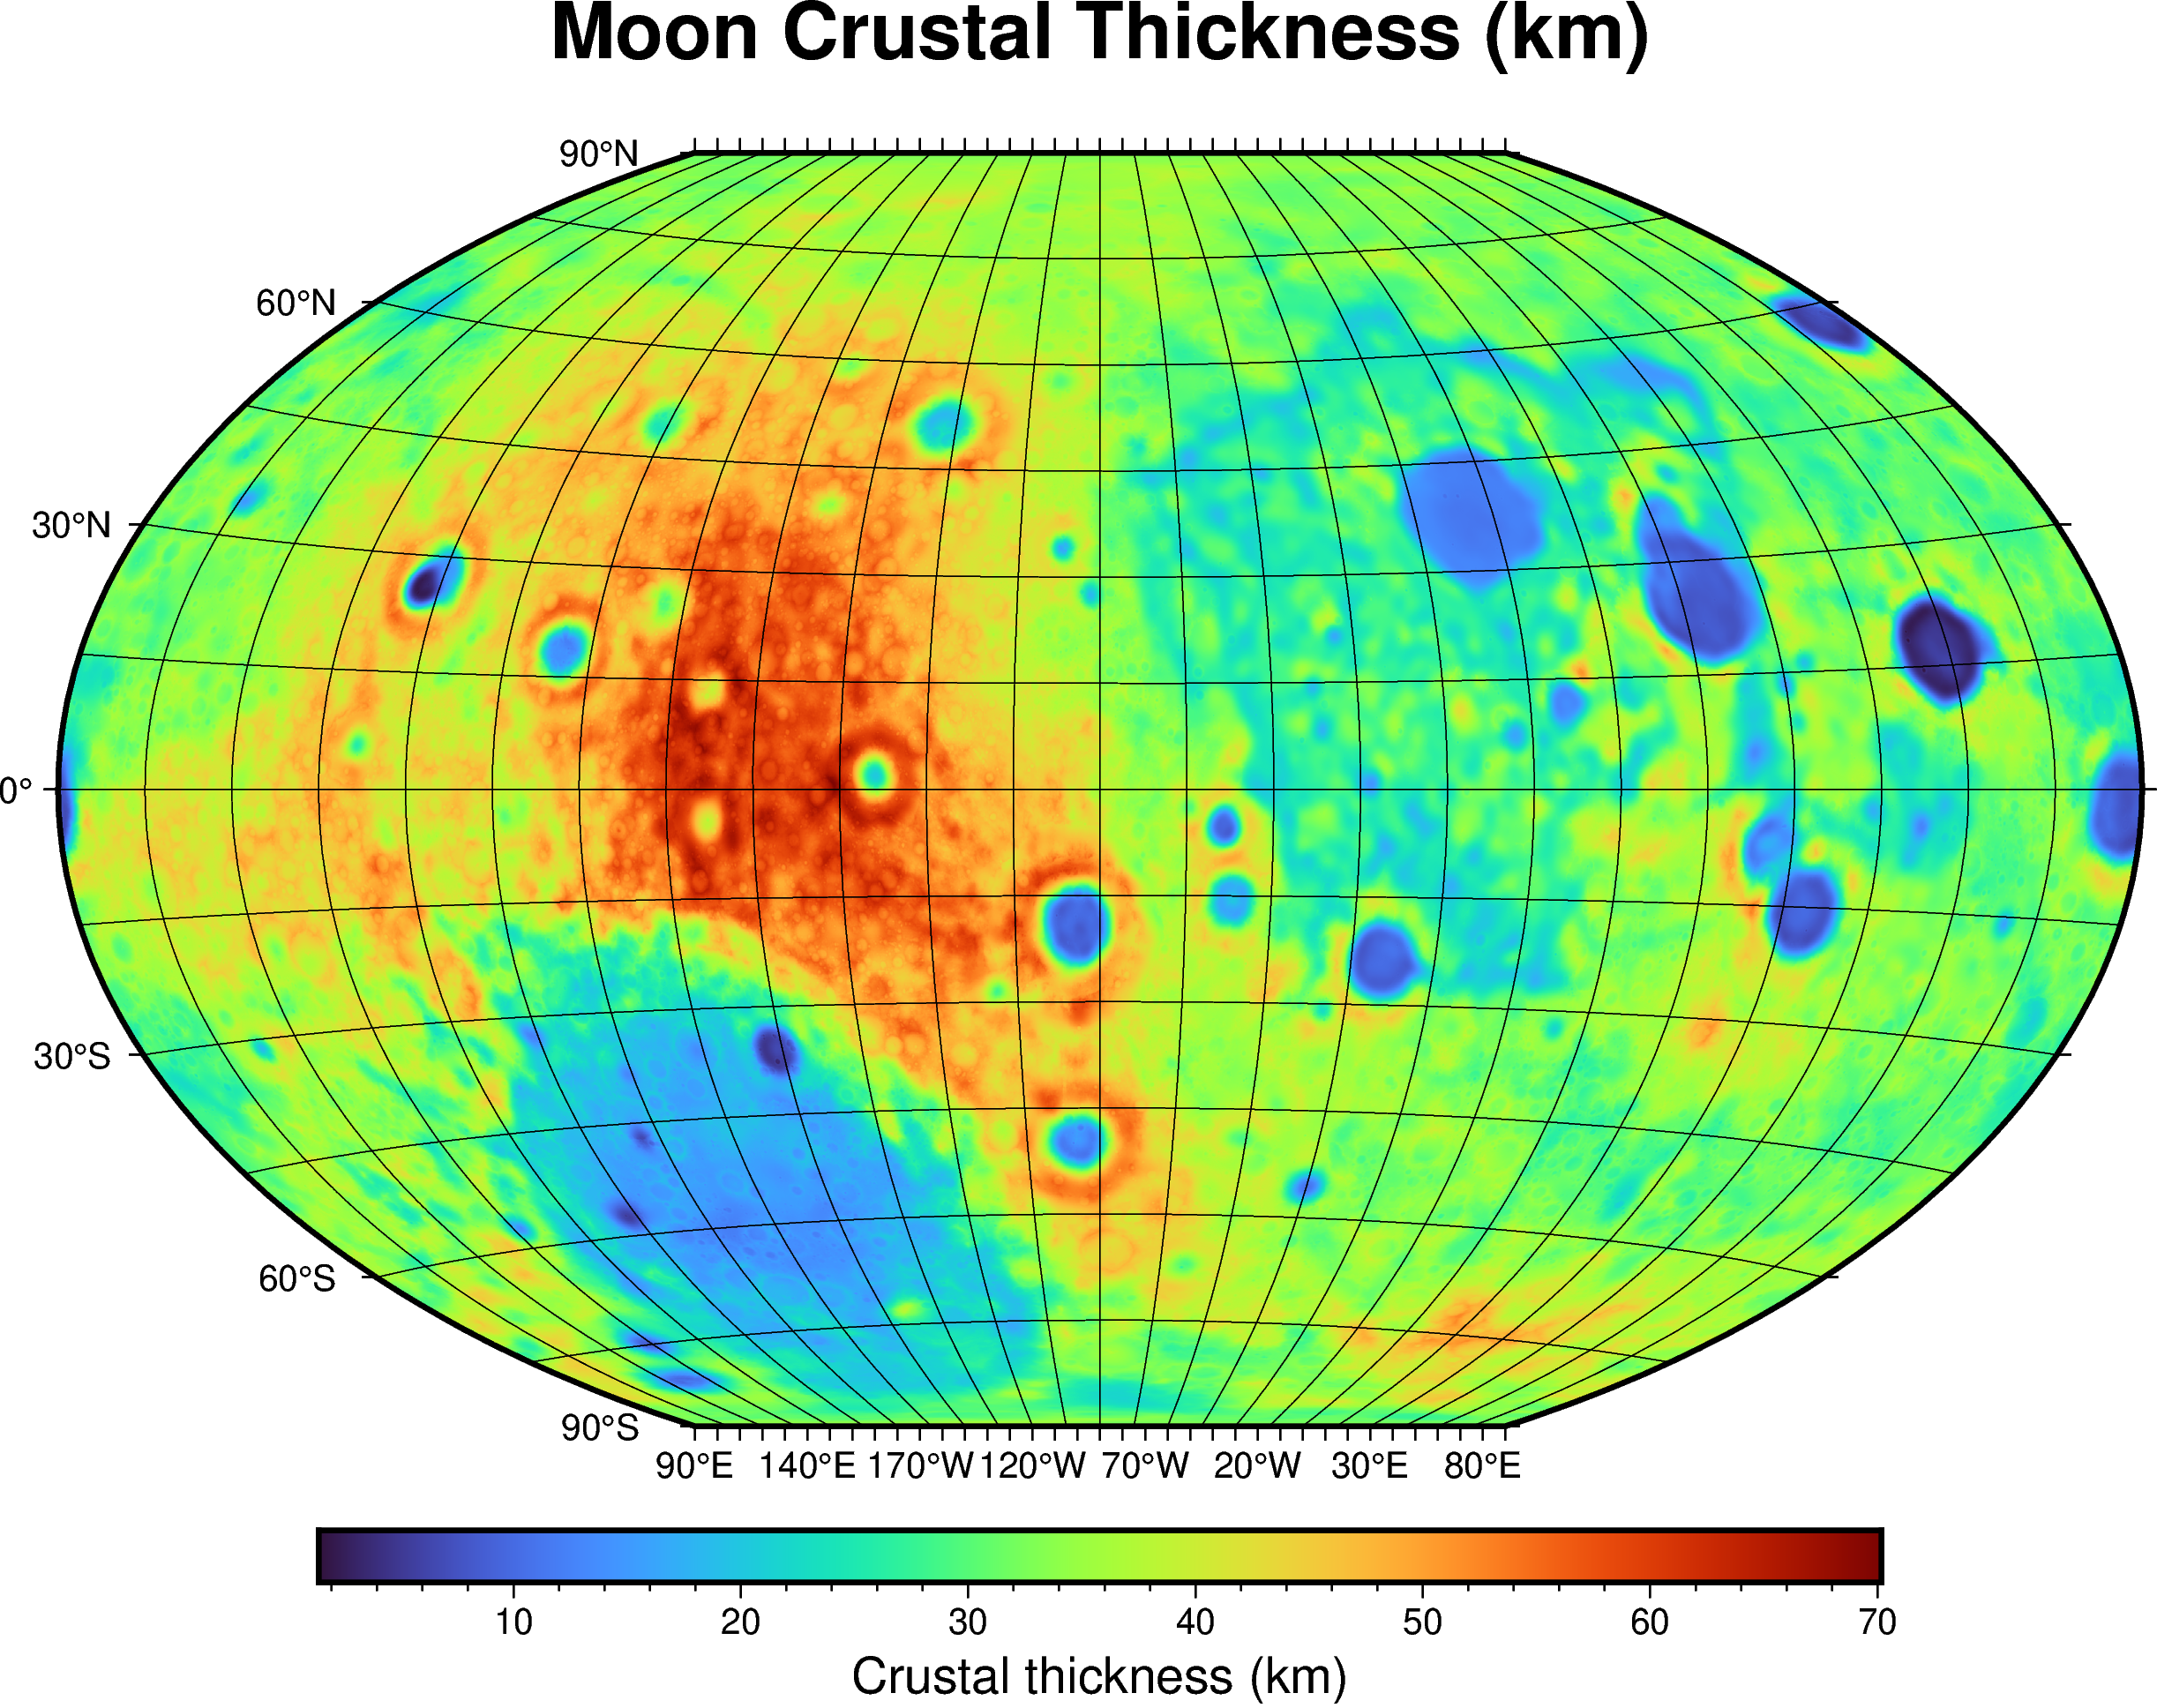

In [ ]:
fig.show()
fig.savefig(result_filename, dpi=600)